In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

## Faz o carregamento da base e aplica limpezas

In [24]:
# Carrega a base
dataset = pd.read_csv("../data/dataset.csv").dropna()

# Define as regras para limpeza dos dados
q1 = np.percentile(dataset["Income"].values, 25)
q3 = np.percentile(dataset["Income"].values, 75)

ano_min = 1930
renda_min = q1 - 1.5 * (q3 - q1)
renda_max = q3 + 1.5 * (q3 - q1)

# Para cada registro, avalia as regras de permanência
novo_dataset = []
for i in range(0, len(dataset)):
    ano = dataset["Year_Birth"].values[i]
    renda = dataset["Income"].values[i]
    
    if ano > ano_minimo and (renda > renda_min and renda < renda_max):
        novo_dataset.append(dataset.values[i])
        
dataset = pd.DataFrame(novo_dataset, columns=dataset.columns)

## Aplica encoder para variáveis categóricas

In [28]:
# Cria função para agrupamento de datas de nascimento
def encode_ano(ano: int):
    anos = [n for n in range(1940, 2010, 10)]
    
    for n in range(0, len(anos) - 1):
        if n == 0 and ano < anos[n]:
            return f"-{anos[n]}"
        elif ano >= anos[n] and ano < anos[n + 1]:
            return f"{anos[n]}-{anos[n + 1]}"
        elif n == len(anos) - 2 and ano >= anos[n + 1]:
            return f"+{anos[n + 1]}"
        
# Utiliza o encoder para colunas categóricas
le_escolaridade = LabelEncoder()
le_escolaridade.fit(dataset["Education"].values)

le_estado_civil = LabelEncoder()
le_estado_civil.fit(dataset["Marital_Status"].values)

le_nascimento = LabelEncoder()
le_nascimento.fit([encode_ano(v) for v in dataset["Year_Birth"].values])

LabelEncoder()

## Aplica clusterização para clientes

In [51]:
# Define matriz de entrada
cat_nascimento = le_nascimento.transform([encode_ano(v) for v in dataset["Year_Birth"].values])
cat_escolaridade = le_escolaridade.transform(dataset["Education"].values)
cat_estado_civil = le_estado_civil.transform(dataset["Marital_Status"].values)

qntd_registros = len(cat_nascimento)
matriz_cliente = [[
    cat_nascimento[n],
    cat_escolaridade[n],
    cat_estado_civil[n],
    dataset["Income"].values[n],
    dataset["Kidhome"].values[n],
    dataset["Teenhome"].values[n]
] for n in range(0, qntd_registros)]

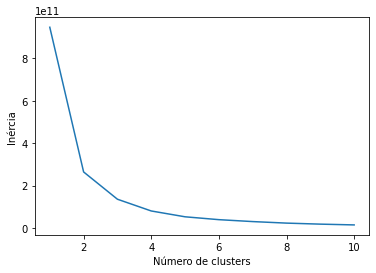

In [38]:
# Avaliza o número de clusters possíveis
inercia = []
for i in range(1, 11):
    cluster = KMeans(n_clusters=i, random_state=0)
    cluster.fit(matriz_cliente)
    inercia.append(cluster.inertia_)
    
plt.plot(range(1, 11), inercia)
plt.xlabel("Número de clusters")
plt.ylabel("Inércia") 
plt.show()

In [49]:
len(matriz_cliente[0])

7

In [52]:
# Treina o modelo de clusterização para clientes e encontra os grupos
model_clientes = KMeans(n_clusters=6, random_state=0)
model_clientes.fit(matriz_cliente)

colunas = [
    "nascimento", "escolaridade", "estado_civil",
    "renda", "criancas", "adolescentes", "grupo"
]
for n in range(0, qntd_registros):
    matriz_cliente[n].append(model_clientes.labels_[n])
    
matriz_cliente = pd.DataFrame(matriz_cliente, columns=colunas)
    
# Encontra metadados sobre os clusters
for grupo in set(model_clientes.labels_):
    subset = matriz_cliente.loc[matriz_cliente["grupo"] == grupo]
    print(f"{len(subset)} clientes para o grupo {grupo}")

442 clientes para o grupo 0
288 clientes para o grupo 1
394 clientes para o grupo 2
401 clientes para o grupo 3
410 clientes para o grupo 4
270 clientes para o grupo 5


In [44]:
a = np.reshape(model_clientes.labels_, (-1, 1))
np.concatenate(np.array(matriz_cliente), a)

TypeError: only integer scalar arrays can be converted to a scalar index

In [ ]:
# Define matriz de entrada
cat_nascimento = le_nascimento.transform([encode_ano(v) for v in dataset["Year_Birth"].values])
cat_escolaridade = le_escolaridade.transform(dataset["Education"].values)
cat_estado_civil = le_estado_civil.transform(dataset["Marital_Status"].values)

qntd_registros = len(cat_nascimento)
matriz = [[
    cat_nascimento[n],
    cat_escolaridade[n],
    cat_estado_civil[n],
    dataset["Income"].values[n],
    dataset["Kidhome"].values[n],
    dataset["Teenhome"].values[n]
] for n in range(0, qntd_registros)]

# Define as colunas para agrupamento de clientes
col_grupo_clientes = [
    "Year_Birth",
    "Education",
    "Marital_Status",
    #"Income",
    "Kidhome",
    "Teenhome"
]
df_clientes = dataset[col_grupo_clientes]

# Prepara os dados para agrupamento de perfil de clientes
le_ed = LabelEncoder()
df_clientes["Education"] = le_ed.fit_transform(df_clientes["Education"].values)

le_ec = LabelEncoder()
df_clientes["Marital_Status"] = le_ec.fit_transform(df_clientes["Marital_Status"].values)

# Executa análise para quantidade de clusters
inercia = []
for i in range(1, 11):
    cluster = KMeans(n_clusters=i, random_state=0)
    cluster.fit(df_clientes.values)
    inercia.append(cluster.inertia_)
    
plt.plot(range(1, 11), inercia)
plt.xlabel("Número de clusters")
plt.ylabel("Inércia") 
plt.show()

In [23]:
min(dataset["Year_Birth"].values)

1940

In [3]:
dataset.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')